## Observations and Insights

## Dependencies and starter code

In [1]:
# Observations
# 1) Big mice have big tumors and vice versa.
# 2) Increasing the number of data points does not decrease the standard error.
# 3) Capomulin and Ramicane appear to have similar effects on tumor size

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = merged_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = merged_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = merged_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = merged_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = merged_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

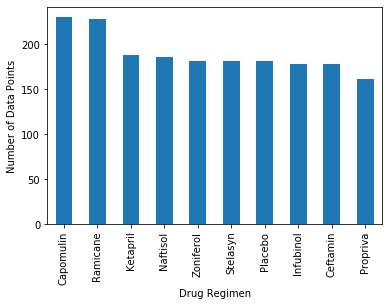

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = merged_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

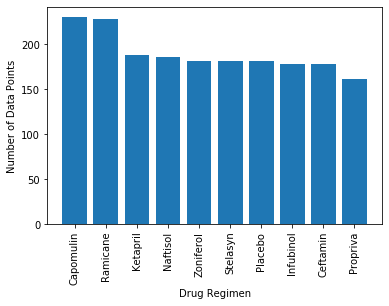

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = merged_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

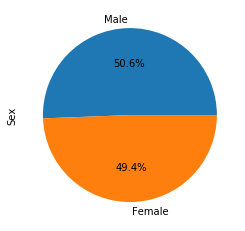

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = merged_data['Sex'].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

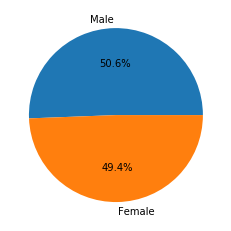

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = merged_data['Sex'].value_counts()
counts
plt.pie(counts, labels=counts.index.values, autopct="%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# max tumor for each mouse
max_tumor = merged_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

# last tumor measurement for each mouse
tumor_merged_data = max_tumor[['Mouse ID','Timepoint']].merge(merged_data,on=['Mouse ID','Timepoint'],how="left")

# 4 with lowest standard error
capomulin = tumor_merged_data.loc[tumor_merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = tumor_merged_data.loc[tumor_merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = tumor_merged_data.loc[tumor_merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = tumor_merged_data.loc[tumor_merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']



In [12]:
# determine if capomulin has any outliers
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < capomulin_lower_bound) | (capomulin > capomulin_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [13]:
# determine if ramicane has any outliers
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ramicane_lower_bound) | (ramicane > ramicane_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# determine if infubinol has any outliers
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infubinol_lower_bound) | (infubinol > infubinol_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [15]:
# determine if capomulin has any outliers
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < ceftamin_lower_bound) | (ceftamin > ceftamin_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


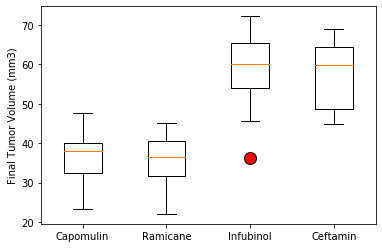

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

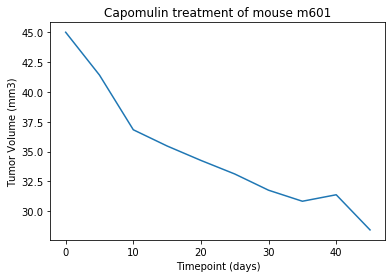

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"]
mousedata = cap_mouse.loc[cap_mouse['Mouse ID']== 'm601']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse m601')
plt.show()

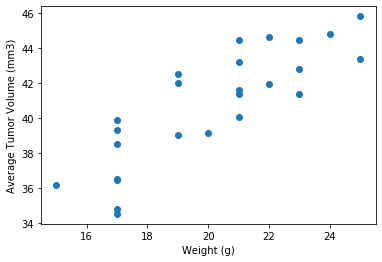

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
all_cap_mouse = merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"]
micedata = all_cap_mouse.groupby(['Mouse ID']).mean()
plt.scatter(micedata['Weight (g)'],micedata['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


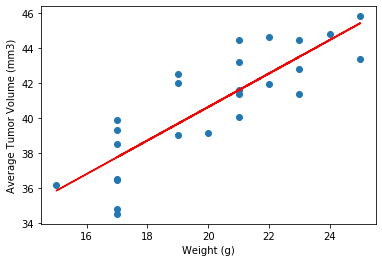

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(micedata['Weight (g)'],micedata['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(micedata['Weight (g)'],micedata['Tumor Volume (mm3)'])
y_values = micedata['Weight (g)']*model[0]+model[1]
plt.scatter(micedata['Weight (g)'],micedata['Tumor Volume (mm3)'])
plt.plot(micedata['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()